In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
loan = pd.read_csv('loan_data.csv')
np.random.seed(12345)

In [6]:
loan.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
loan.shape

(9578, 14)

In [8]:
loan.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [9]:
# Hygiene check
loan.dtypes
loan.isnull().sum(axis=1)

#0       0
#1       0
#2       0
#3       0
#4       0
#       ..
#9573    0
#9574    0
#9575    0
#9576    0
#9577    0
#Length: 9578, dtype: int64



0       0
1       0
2       0
3       0
4       0
       ..
9573    0
9574    0
9575    0
9576    0
9577    0
Length: 9578, dtype: int64

In [10]:
loan.isnull().sum(axis=0)

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [11]:
loan.columns= ['Credit_policy', 'Purpose', 'Interest', 'Installment', 'Log_Income',
       'DTI', 'FICO', 'Days_Cr_Line', 'Revolve_Bal', 'Revol_Uti',
       'Inquiries_6mths', '30_LatePayment', 'Pub_Rec', 'Target']

In [12]:
loan.describe()
# Check if data streatification is required
loan['Target'].value_counts()

# Data is highly imbalanced, to stratify when splitting data

0    8045
1    1533
Name: Target, dtype: int64

In [13]:
loan.agg(    
    {
        "Credit_policy": ["min", "max", 'mean',"median", "skew"],
        "Interest": ["min", "max", 'mean',"median", "skew"],
        "Installment": ["min", "max", 'mean',"median", "skew"],
        'Log_Income': ["min", "max", 'mean',"median", "skew"],
        'DTI' : ["min", "max", 'mean',"median", "skew"],
        'FICO' : ["min", "max", 'mean',"median", "skew"],
        'Days_Cr_Line' : ["min", "max", 'mean',"median", "skew"],
        'Revolve_Bal' : ["min", "max", 'mean',"median", "skew"],
        'Revol_Uti' : ["min", "max", 'mean',"median", "skew"],
    }
)

,Credit_policy,Interest,Installment,Log_Income,DTI,FICO,Days_Cr_Line,Revolve_Bal,Revol_Uti
min,0.000000,0.06000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000
max,1.000000,0.21640,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000
mean,0.804970,0.12264,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236
median,1.000000,0.12210,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000
skew,-1.539621,0.16442,0.912522,0.028668,0.023941,0.471260,1.155748,1.116106e+01,0.059985


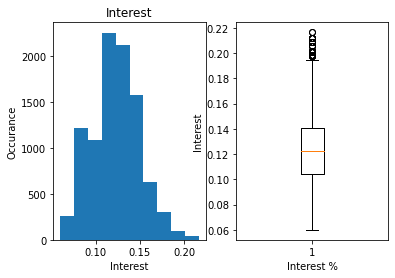

In [14]:
plt.subplot(1,2,1) #row=1,col=2,count=1
plt.hist(loan["Interest"])
plt.title("Interest")
plt.xlabel("Interest")
plt.ylabel("Occurance")
plt.subplot(1,2,2) #row=1,col=2,count=1
plt.boxplot(loan["Interest"])
plt.xlabel("Interest %")
plt.ylabel("Interest")
plt.show()

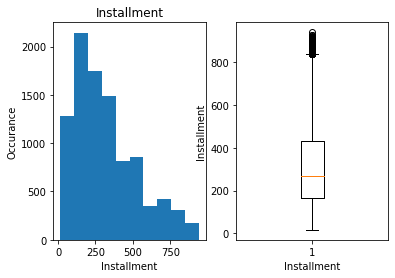

In [15]:
plt.subplot(1,2,1) #row=1,col=2,count=1
plt.hist(loan["Installment"])
plt.title("Installment")
plt.xlabel("Installment")
plt.ylabel("Occurance")
plt.subplot(1,2,2) #row=1,col=2,count=1
plt.boxplot(loan["Installment"])
plt.xlabel("Installment")
plt.ylabel("Installment")
plt.show()

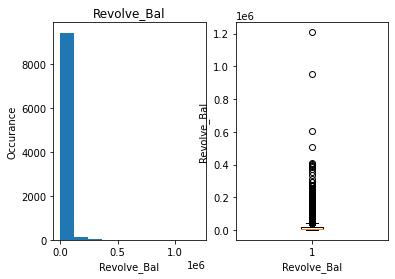

In [16]:
plt.subplot(1,2,1) #row=1,col=2,count=1
plt.hist(loan["Revolve_Bal"])
plt.title("Revolve_Bal")
plt.xlabel("Revolve_Bal")
plt.ylabel("Occurance")
plt.subplot(1,2,2) #row=1,col=2,count=1
plt.boxplot(loan["Revolve_Bal"])
plt.xlabel("Revolve_Bal")
plt.ylabel("Revolve_Bal")
plt.show()

In [17]:
#Outlier management for Revolving Balance
Q3 = np.percentile(loan.loc[:,"Revolve_Bal"],[75])
Q1 = np.percentile(loan.loc[:,"Revolve_Bal"],[25])
print(Q3)
print(Q1)
IQR = Q3 - Q1
Upper_whisker_boxplot = Q3 + 1.5 * IQR
Lower_whisker_boxplot = Q1 - 1.5 * IQR
loan['Outlier_flag_revolbal'] = np.where((loan.Revolve_Bal <= int(Upper_whisker_boxplot)),"No","Yes")
loan_clean = loan[loan.Outlier_flag_revolbal == "No"].reset_index(drop=True)
print(loan_clean)

[18249.5]
[3187.]
      Credit_policy             Purpose  Interest  Installment  Log_Income  \
0                 1  debt_consolidation    0.1189       829.10   11.350407   
1                 1         credit_card    0.1071       228.22   11.082143   
2                 1  debt_consolidation    0.1357       366.86   10.373491   
3                 1  debt_consolidation    0.1008       162.34   11.350407   
4                 1         credit_card    0.1426       102.92   11.299732   
...             ...                 ...       ...          ...         ...   
8793              0  debt_consolidation    0.1565        69.98   10.110472   
8794              0           all_other    0.1253       257.70   11.141862   
8795              0  debt_consolidation    0.1071        97.81   10.596635   
8796              0    home_improvement    0.1600       351.58   10.819778   
8797              0  debt_consolidation    0.1392       853.43   11.264464   

        DTI  FICO  Days_Cr_Line  Revolve_Bal 

In [18]:
loan_clean.agg(    
    {
        'Revolve_Bal' : ["min", "max", 'mean',"median", "skew"],
    }
)

,Revolve_Bal
min,0.000000
max,40781.000000
mean,10200.691975
median,7513.000000
skew,1.120061


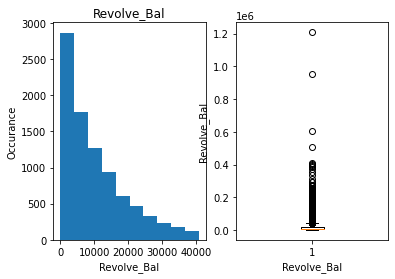

In [19]:
plt.subplot(1,2,1) #row=1,col=2,count=1
plt.hist(loan_clean["Revolve_Bal"])
plt.title("Revolve_Bal")
plt.xlabel("Revolve_Bal")
plt.ylabel("Occurance")
plt.subplot(1,2,2) #row=1,col=2,count=1
plt.boxplot(loan["Revolve_Bal"])
plt.xlabel("Revolve_Bal")
plt.ylabel("Revolve_Bal")
plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


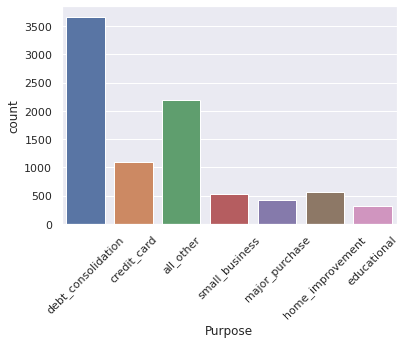

In [20]:
sns.set_theme(style="darkgrid")
sns.countplot('Purpose',data=loan_clean)
plt.xticks(rotation = 45)
plt.show()

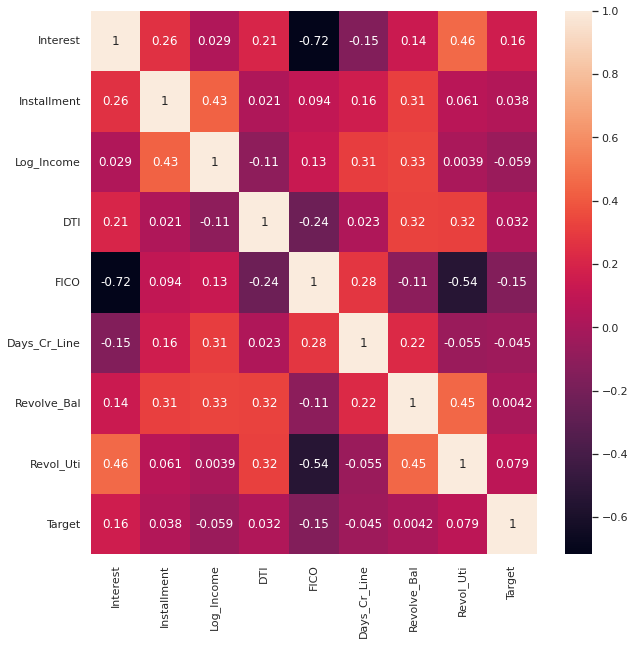

,Interest,Installment,Log_Income,DTI,FICO,Days_Cr_Line,Revolve_Bal,Revol_Uti,Target
Interest,1.000000,0.258156,0.029321,0.206134,-0.718092,-0.152918,0.138853,0.458848,0.157472
Installment,0.258156,1.000000,0.433343,0.020962,0.094186,0.157936,0.312583,0.060695,0.037720
Log_Income,0.029321,0.433343,1.000000,-0.106234,0.130649,0.307335,0.333813,0.003896,-0.059114
DTI,0.206134,0.020962,-0.106234,1.000000,-0.237912,0.023398,0.324577,0.319708,0.031627
FICO,-0.718092,0.094186,0.130649,-0.237912,1.000000,0.277987,-0.113177,-0.540193,-0.151948
Days_Cr_Line,-0.152918,0.157936,0.307335,0.023398,0.277987,1.000000,0.224139,-0.054650,-0.045336
Revolve_Bal,0.138853,0.312583,0.333813,0.324577,-0.113177,0.224139,1.000000,0.453503,0.004182
Revol_Uti,0.458848,0.060695,0.003896,0.319708,-0.540193,-0.054650,0.453503,1.000000,0.078979
Target,0.157472,0.037720,-0.059114,0.031627,-0.151948,-0.045336,0.004182,0.078979,1.000000


In [21]:
loan_clean_cont = loan_clean.loc[:,['Interest', 'Installment', 'Log_Income',
       'DTI', 'FICO', 'Days_Cr_Line', 'Revolve_Bal', 'Revol_Uti','Target']]
ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(loan_clean_cont.corr(),annot=True)
plt.show()
loan_clean_cont.corr()

# Weak correlation between interest and FICO on probability of default
# 15% of lenders who are assigned higher interest rates have a higher chance of default
# 15% of lenders who have lower FICO score will default
# 71% of lenders with higher FICO scores usually pay a lower interest rate (FICO vs Interest), hence lenders are able to pay off their loans well 
# 7.8% of lenders who default have a higher no. of credit line used vs total available credit
# Most lenders have a lower revolving balance, hence revolving balance is not a good indicator of whether a lender will default his/her loan
# Lenders who declare a lower annual income have a higher change of defaulting

#Significant features: Interest,FICO,Log_income,Revol_uti

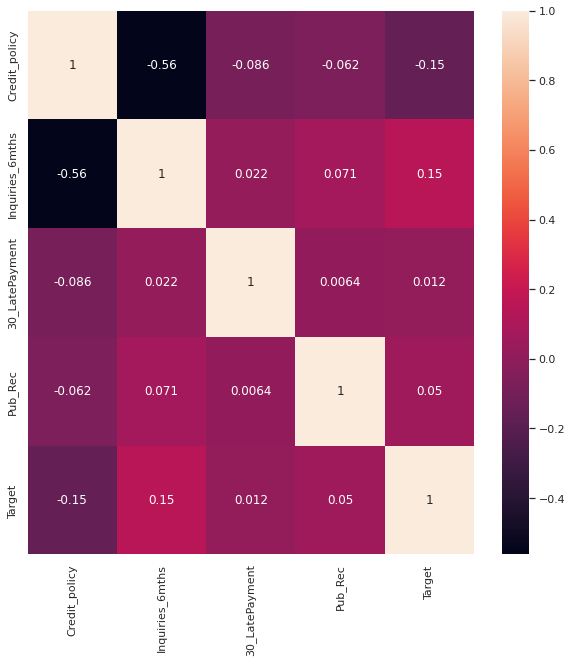

,Credit_policy,Inquiries_6mths,30_LatePayment,Pub_Rec,Target
Credit_policy,1.000000,-0.561455,-0.086479,-0.061910,-0.154068
Inquiries_6mths,-0.561455,1.000000,0.022425,0.070751,0.146369
30_LatePayment,-0.086479,0.022425,1.000000,0.006447,0.012164
Pub_Rec,-0.061910,0.070751,0.006447,1.000000,0.049861
Target,-0.154068,0.146369,0.012164,0.049861,1.000000


In [22]:
loan_clean_cat = loan_clean.loc[:,['Credit_policy', 'Purpose',
       'Inquiries_6mths', '30_LatePayment', 'Pub_Rec', 'Target']]

ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(loan_clean_cat.corr(),annot=True)
plt.show()
loan_clean_cat.corr()

# Weak correlation between credit policy and no. of enquiries over the last 6 months against probability of default.
# 15% of lenders who default does not meets the lending criteria (Credit_policy)
# 14% of lenders who default enquired about their loan over the past 6 months
# 5% of lenders who default have a poor public record

#Significant features: Credit_policy,Inquiries_6mths,Pub_rec

[(0, 'Credit_policy'), (1, 'Purpose'), (2, 'Inquiries_6mths'), (3, '30_LatePayment'), (4, 'Pub_Rec'), (5, 'Target')]


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn

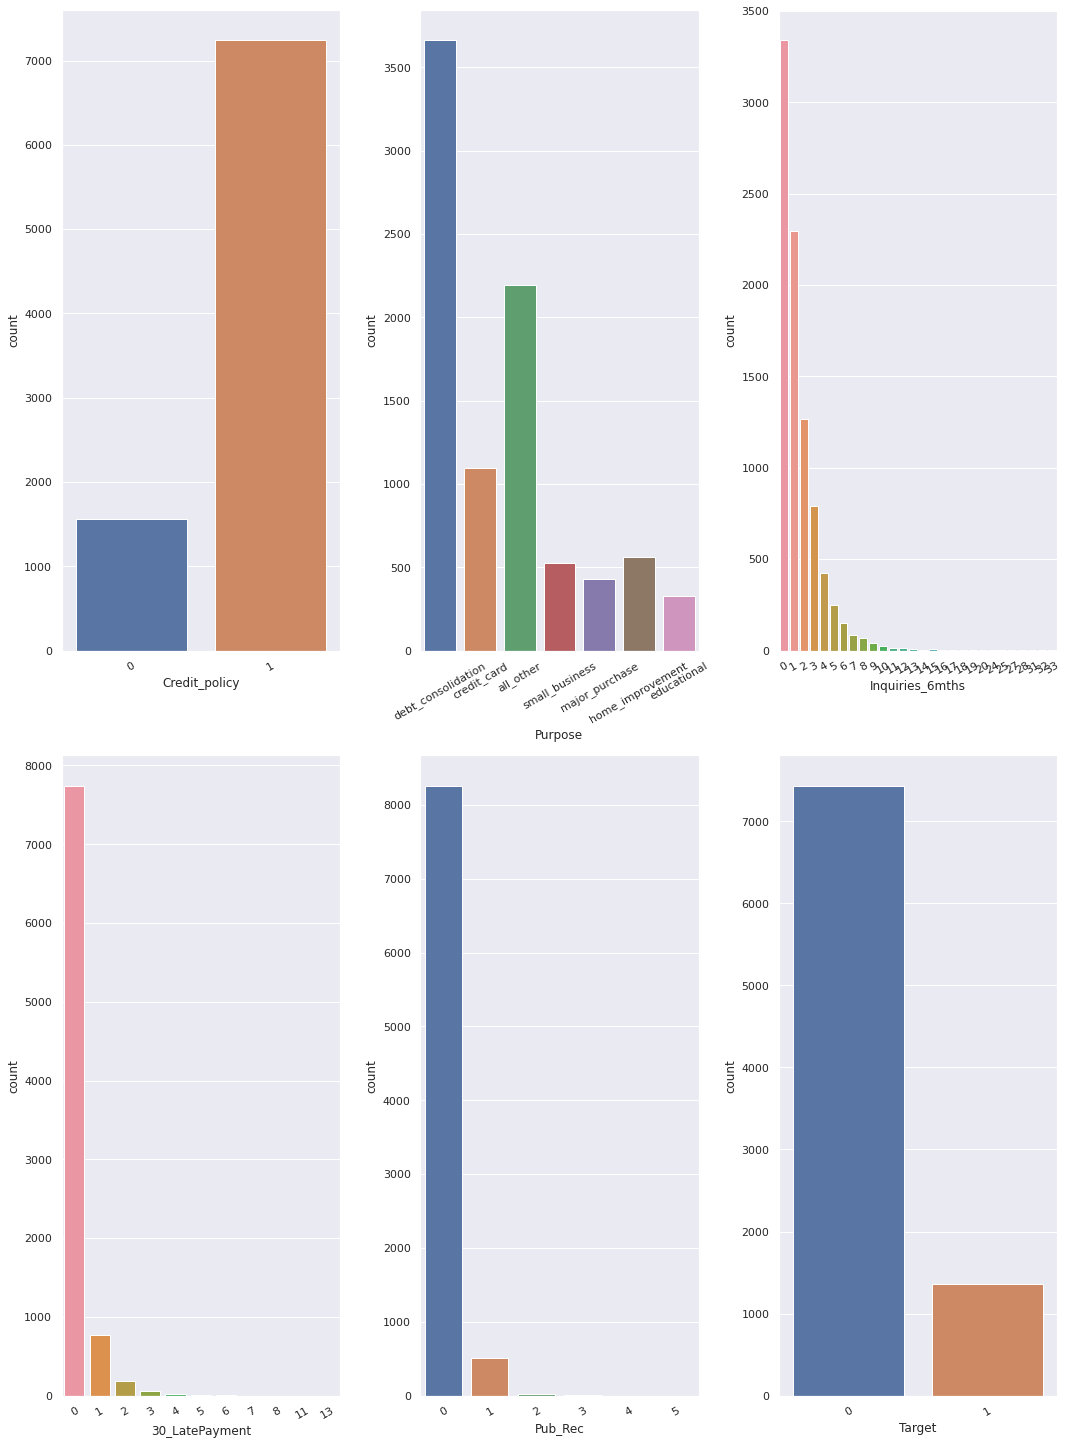

In [23]:
cols = list(enumerate(loan_clean_cat))
print(cols)
plt.figure(figsize = (15,30),tight_layout = True)
for i in enumerate(loan_clean_cat):
    plt.subplot(3,3,i[0]+1)
    sns.set_theme(style="darkgrid")
    sns.countplot(i[1],data=loan_clean_cat)
    plt.xticks(rotation = 30)
plt.show()

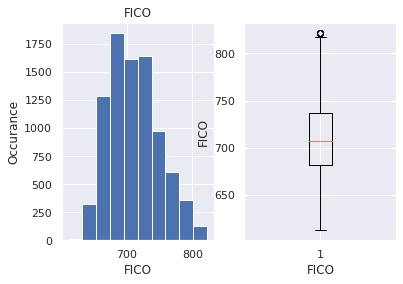

In [24]:
plt.subplot(1,2,1) #row=1,col=2,count=1
plt.hist(loan_clean_cont["FICO"])
plt.title("FICO")
plt.xlabel("FICO")
plt.ylabel("Occurance")
plt.subplot(1,2,2) #row=1,col=2,count=1
plt.boxplot(loan_clean_cont["FICO"])
plt.xlabel("FICO")
plt.ylabel("FICO")
plt.show()

In [25]:
loan_final = loan.loc[:,['Credit_policy', 'Interest','Log_Income','FICO', 'Revol_Uti',
       'Inquiries_6mths', 'Pub_Rec', 'Target']]
loan_final.head(5)

,Credit_policy,Interest,Log_Income,FICO,Revol_Uti,Inquiries_6mths,Pub_Rec,Target
0,1,0.1189,11.350407,737,52.1,0,0,0
1,1,0.1071,11.082143,707,76.7,0,0,0
2,1,0.1357,10.373491,682,25.6,1,0,0
3,1,0.1008,11.350407,712,73.2,1,0,0
4,1,0.1426,11.299732,667,39.5,0,0,0


In [26]:
X= loan_final.drop(['Target'],axis=1)
y= loan_final['Target']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                  stratify = y,
                                                  train_size = 0.8,
                                                  random_state = 12345)
print(X_train.head(5))
print(y_train.head(5))
print(X_train.shape)
print(X_test.shape)


      Credit_policy  Interest  Log_Income  FICO  Revol_Uti  Inquiries_6mths  \
1279              1    0.1412   10.385914   682       68.0                1   
262               1    0.0933   10.505068   727        6.6                2   
7922              0    0.1438   11.245046   642      101.4                6   
1959              1    0.0963   10.650887   727       36.7                1   
4095              1    0.0859   11.350407   762       86.1                1   

      Pub_Rec  
1279        1  
262         0  
7922        0  
1959        0  
4095        0  
1279    0
262     1
7922    1
1959    0
4095    0
Name: Target, dtype: int64
(7662, 7)
(1916, 7)


In [27]:
y_train.value_counts()

0    6436
1    1226
Name: Target, dtype: int64

In [28]:
#############################################
######### OVER-SAMPLING USING SMOTE #########
#############################################

from imblearn.over_sampling import SMOTE
columns = X_train.columns
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Target'])

print("Length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Target']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Target']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Target']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Target']==1])/len(os_data_X))

Length of oversampled data is  12872
Number of no subscription in oversampled data 6436
Number of subscription 6436
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


In [30]:
X_train_sc
X_test_sc

array([[-2.03271963,  2.11696012,  0.28517902, ...,  0.10286321,
         0.6465707 , -0.24341266],
       [-2.03271963, -0.93627849, -0.28758833, ..., -0.954337  ,
        -0.72421643, -0.24341266],
       [ 0.49195176, -1.64058384, -0.35286077, ..., -0.89923862,
         0.6465707 , -0.24341266],
       ...,
       [ 0.49195176, -1.10111592, -1.29813654, ..., -0.84414024,
        -0.72421643, -0.24341266],
       [ 0.49195176, -0.01843376,  0.06060856, ..., -0.7993728 ,
         0.6465707 , -0.24341266],
       [ 0.49195176,  1.40141586, -0.75816313, ...,  0.68828353,
        -0.26728739, -0.24341266]])

In [31]:
import tensorflow as tf

print(tf.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
model = Sequential()

2.8.0


In [32]:
model.add(Input(shape = (X_train_sc.shape[1],))) # Input Layer

In [33]:
#Add first hidden layer- 128 neurons, Relu activation
model.add(Dense(units=128,
                activation='relu',
                kernel_regularizer = tf.keras.regularizers.L1()
               ))
#Add second hidden layer- 64 neurons, Relu activation
model.add(Dense(units=64,
                activation='relu'
               ))

#Add Third hidden layer- 32 neurons, Relu activation
model.add(Dense(units=32,
                activation='relu'
               ))

#Add Output hidden layer
#Sigmoid as this is a binary
model.add(Dense(units=1,
                activation='sigmoid'
               ))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,393
Trainable params: 11,393
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Optimizer is a variant of Gradient descent
model.compile(optimizer='adam',
              loss = 'binary_crossentropy', #Binary Cross Entrophy
              metrics = ['accuracy']) # Monitory Accuracy

In [36]:
result = model.fit(X_train_sc,
                   y_train,
                   validation_data = (X_test_sc,y_test),
                   epochs=50)

Epoch 1/50
240/240 [==============================] - 7s 3ms/step - loss: 0.7591 - accuracy: 0.8332 - val_loss: 0.4509 - val_accuracy: 0.8398
Epoch 2/50
240/240 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.8400 - val_loss: 0.4371 - val_accuracy: 0.8398
Epoch 3/50
240/240 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.8400 - val_loss: 0.4312 - val_accuracy: 0.8398
Epoch 4/50
240/240 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8400 - val_loss: 0.4335 - val_accuracy: 0.8398
Epoch 5/50
240/240 [==============================] - 1s 2ms/step - loss: 0.4277 - accuracy: 0.8400 - val_loss: 0.4299 - val_accuracy: 0.8398
Epoch 6/50
240/240 [==============================] - 1s 2ms/step - loss: 0.4266 - accuracy: 0.8400 - val_loss: 0.4306 - val_accuracy: 0.8398
Epoch 7/50
240/240 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8400 - val_loss: 0.4293 - val_accuracy: 0.8398
Epoch 

In [35]:
y_train_pred = model.predict(X_train_sc)
y_test_pred = model.predict(X_test_sc)

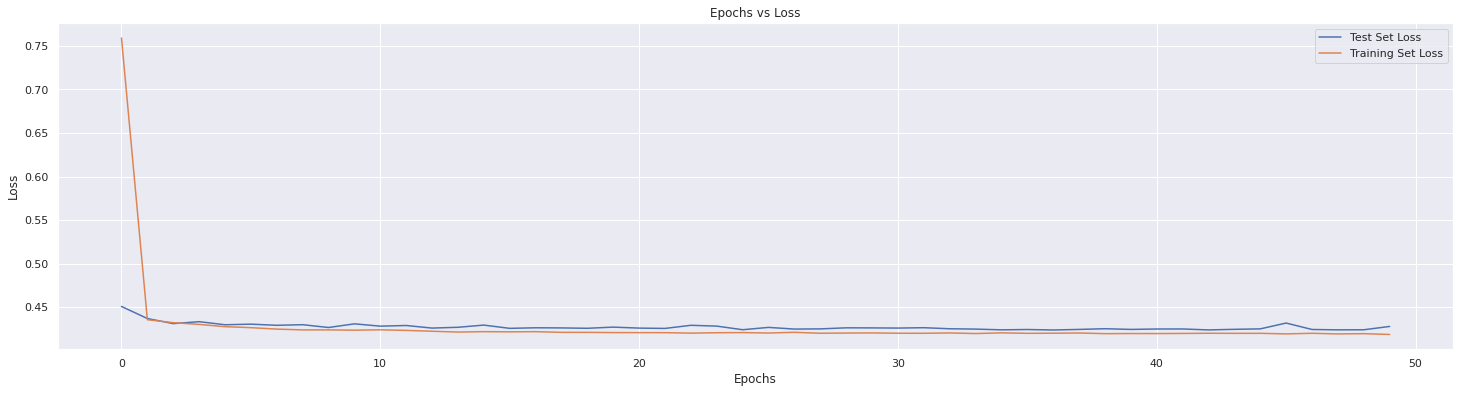

In [37]:
history = pd.DataFrame(result.history)
import matplotlib.pyplot as plt
plt.figure(figsize = (25,6))
plt.plot(history.val_loss, label='Test Set Loss')
plt.plot(history.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

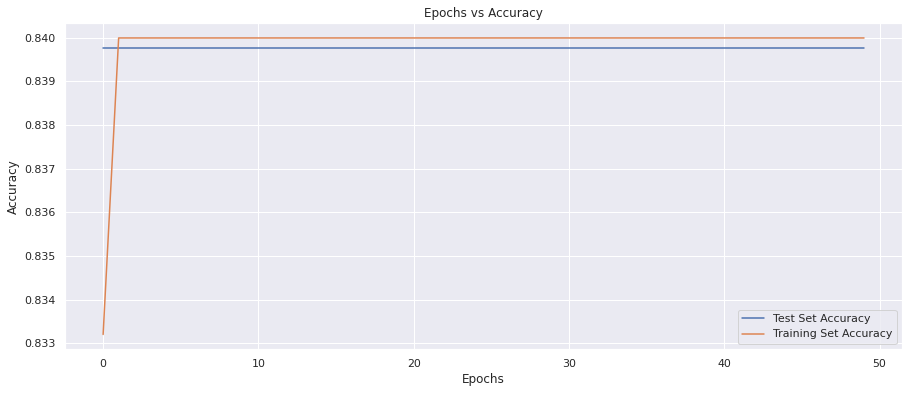

In [38]:
plt.figure(figsize = (15,6))
plt.plot(history.val_accuracy, label='Test Set Accuracy')
plt.plot(history.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
from tensorflow.keras.layers import Dropout
model_drp = Sequential()
model_drp.add(Input(shape = X_train_sc.shape[1],))


In [47]:
model_drp.add(Dense(units=128,
                    activation = 'relu'
                   )
             )

In [48]:
model_drp.add(Dropout(0.5))
model_drp.add(Dense(units=64,activation='relu'))

In [49]:
model_drp.add(Dropout(0.3))
model_drp.add(Dense(units=32,activation='relu'))

In [50]:
model_drp.add(Dropout(0.25))
model_drp.add(Dense(units=1,activation='sigmoid'))

model_drp.summary

In [51]:
model_drp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               1024      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                

In [52]:
model_drp.compile(optimizer='adam',
              loss = 'binary_crossentropy', #Log loss or Binary Cross Entrophy
              metrics = ['accuracy']) # Monitory Accuracy

In [57]:
result_drp = model_drp.fit(X_train_sc,
                   y_train,
                   validation_data = (X_test_sc,y_test),
                   epochs=50)

Epoch 1/50
240/240 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8427 - val_loss: 0.4226 - val_accuracy: 0.8392
Epoch 2/50
240/240 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8422 - val_loss: 0.4235 - val_accuracy: 0.8377
Epoch 3/50
240/240 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8425 - val_loss: 0.4229 - val_accuracy: 0.8387
Epoch 4/50
240/240 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8422 - val_loss: 0.4238 - val_accuracy: 0.8398
Epoch 5/50
240/240 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8413 - val_loss: 0.4256 - val_accuracy: 0.8387
Epoch 6/50
240/240 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8429 - val_loss: 0.4237 - val_accuracy: 0.8392
Epoch 7/50
240/240 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8427 - val_loss: 0.4248 - val_accuracy: 0.8398
Epoch 

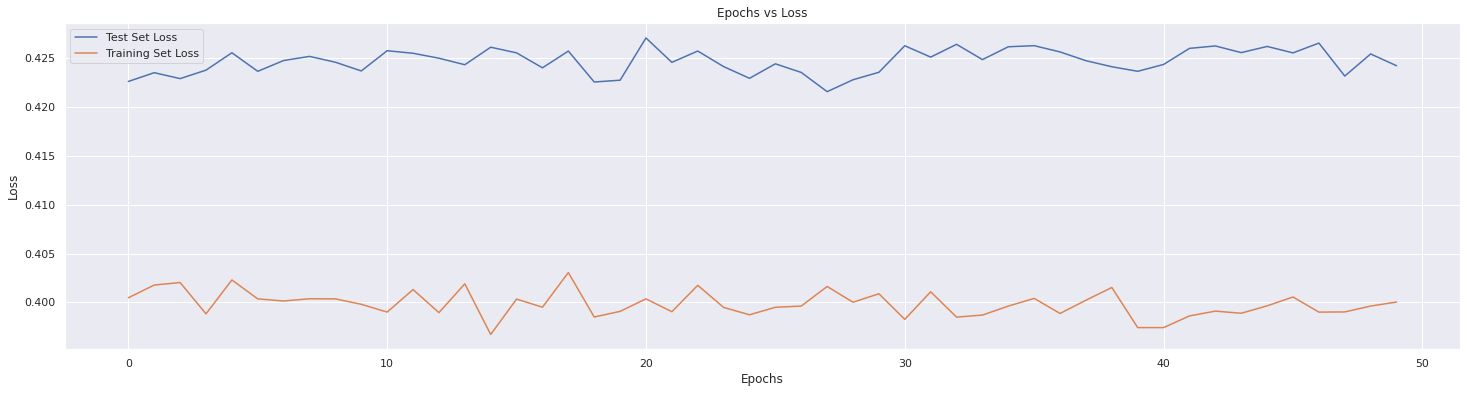

In [61]:
history_drp = pd.DataFrame(result_drp.history)
import matplotlib.pyplot as plt
plt.figure(figsize = (25,6))
plt.plot(history_drp.val_loss, label='Test Set Loss')
plt.plot(history_drp.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Trainig and test loss aren't signigicantly different with dropout function
# Maximum of 2.5% difference between train and test models

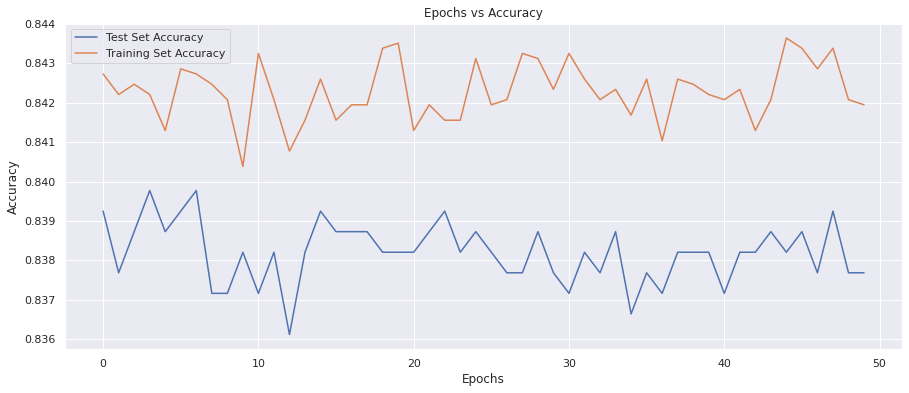

In [60]:
plt.figure(figsize = (15,6))
plt.plot(history_drp.val_accuracy, label='Test Set Accuracy')
plt.plot(history_drp.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Trainig and test accuracy aren't signigicantly different with dropout function
# Maximum of 0.5% difference between train and test model accuracies